# <center>**Credit Risk Modeling**</center>

## Data Loading and Data Cleaning

In [127]:
## Import Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.float_format", lambda x: f'{x:.2f}')
np.set_printoptions(suppress=True)

In [128]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [129]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [130]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [131]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [132]:
df_customers.shape,  df_loans.shape ,  df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [133]:
df = pd.merge(df_customers , df_loans, on='cust_id')
df.shape

(50000, 26)

In [134]:
df = pd.merge(df, df_bureau, on='cust_id')
df.shape

(50000, 33)

In [135]:
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [137]:
## target = 'default' --> converting to int value
df['default'] = df['default'].astype(int)

In [138]:
X = df.drop("default", axis=1)
y = df['default']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((35000, 32), (15000, 32), (35000,), (15000,))

### Handling Null Values

In [139]:
Xtrain.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 44
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [140]:
Xtrain.residence_type.mode()[0]

'Owned'

In [ ]:
## Replace null values with mode for residence_type

In [141]:
Xtrain.residence_type.fillna(Xtrain.residence_type.mode()[0], inplace=True)

In [142]:
Xtest.residence_type.fillna(Xtrain.residence_type.mode()[0], inplace=True)

In [143]:
dftrain = pd.concat([Xtrain, ytrain], axis='columns')
dftest = pd.concat([Xtest, ytest], axis='columns')


In [144]:
dftrain.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
35147,C35148,53,F,Married,Self-Employed,109000,4,Owned,21,Mumbai,...,2023-01-27,2023-01-28,4,0,131,6,36,7,47,0
15711,C15712,45,F,Single,Self-Employed,2513000,1,Owned,3,Mumbai,...,2021-02-17,2021-03-19,1,1,4,4,22,1,96,1
5304,C05305,37,M,Single,Self-Employed,11589000,1,Rented,29,Kolkata,...,2020-02-03,2020-02-26,4,0,137,0,0,9,13,0
24708,C24709,51,M,Single,Self-Employed,1852000,2,Mortgage,21,Lucknow,...,2022-01-11,2022-02-06,3,1,82,0,0,5,33,0
33512,C33513,55,F,Married,Self-Employed,1564000,3,Owned,12,Chennai,...,2022-11-28,2022-12-11,3,0,128,0,0,7,92,0


In [146]:
dftrain.shape, dftest.shape

((35000, 33), (15000, 33))

In [145]:
## Check for duplicates

dftrain.duplicated().sum()

np.int64(0)

In [147]:
# Statistics of numerical columns
dftrain.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00,...,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00,35000.00
mean,39.52,2636009.74,1.94,16.00,418922.46,4709497.91,4004610.31,80487.91,720829.86,3203688.25,...,1335742.30,987225.21,2.50,1.00,76.13,4.83,26.61,5.01,43.48,0.09
std,9.86,2624379.49,1.54,8.92,169122.86,6268099.16,5383853.03,113750.07,969093.54,4307082.42,...,1215359.78,1042520.41,1.12,0.81,43.78,5.84,32.77,2.03,29.42,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,804000.00,0.00,8.00,302001.00,1144000.00,963000.00,19260.00,173340.00,770400.00,...,423889.75,287571.50,2.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,39.00,1887000.00,2.00,16.00,400001.00,2648000.00,2233500.00,44690.00,402030.00,1786800.00,...,998198.00,667523.50,3.00,1.00,71.00,3.00,13.00,5.00,39.00,0.00
75%,46.00,3328250.00,3.00,24.00,560001.00,5198250.00,4628000.00,92580.00,833040.00,3702400.00,...,1785654.00,1235172.50,4.00,2.00,107.00,8.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5293543.52,8607420.00,38255200.00,...,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [26]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 35147 to 25974
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      35000 non-null  object 
 1   age                          35000 non-null  int64  
 2   gender                       35000 non-null  object 
 3   marital_status               35000 non-null  object 
 4   employment_status            35000 non-null  object 
 5   income                       35000 non-null  int64  
 6   number_of_dependants         35000 non-null  int64  
 7   residence_type               35000 non-null  object 
 8   years_at_current_address     35000 non-null  int64  
 9   city                         35000 non-null  object 
 10  state                        35000 non-null  object 
 11  zipcode                      35000 non-null  int64  
 12  loan_id                      35000 non-null  object 
 13  loan_purpose     

In [148]:
dftrain.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [149]:
num_cols = ['age', 'income', 'number_of_dependants', 'years_at_current_address',  
            'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

cat_cols = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']


## Outlier Handling

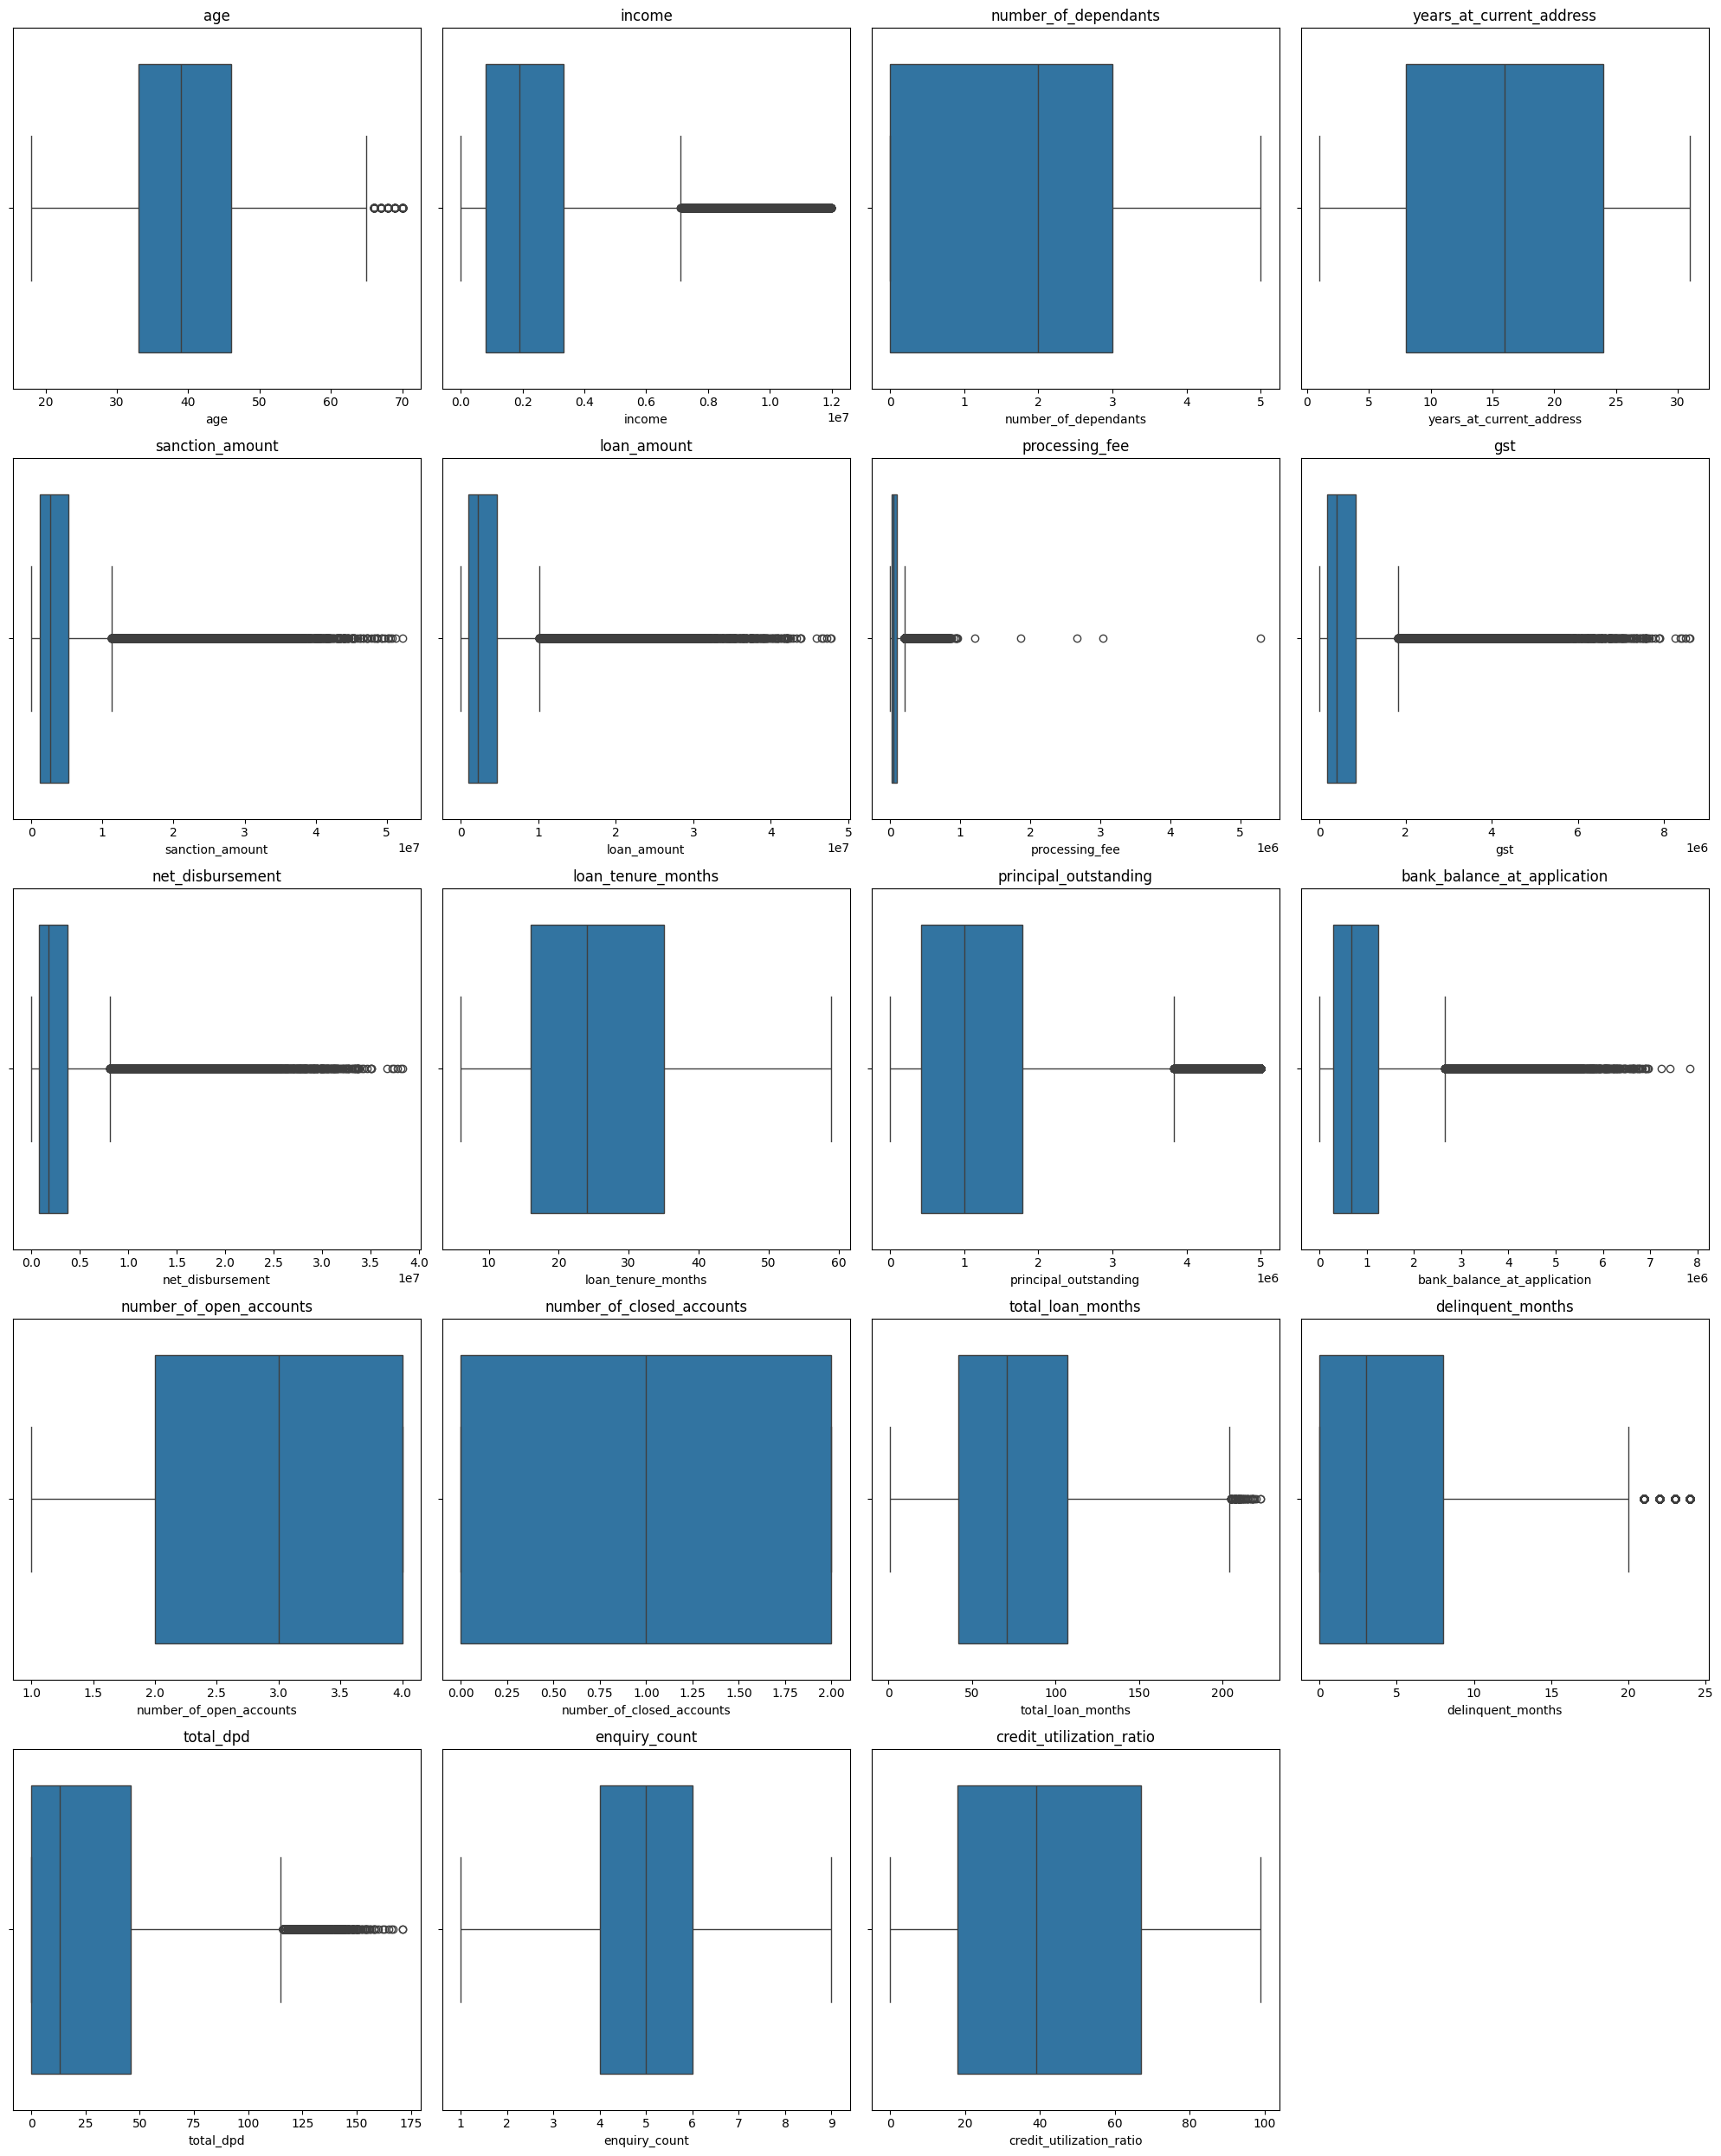

In [30]:
## Outliers check with Box plots

num_plots = len(num_cols)
num_col = 4
num_row = (num_plots+num_col-1)//num_col

fig , axes = plt.subplots(num_row, num_col, figsize=(5*num_col, 5*num_row))
axes = axes.flatten()

for i , col in enumerate(num_cols):
    sns.boxplot(x=dftrain[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, num_row*num_col):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

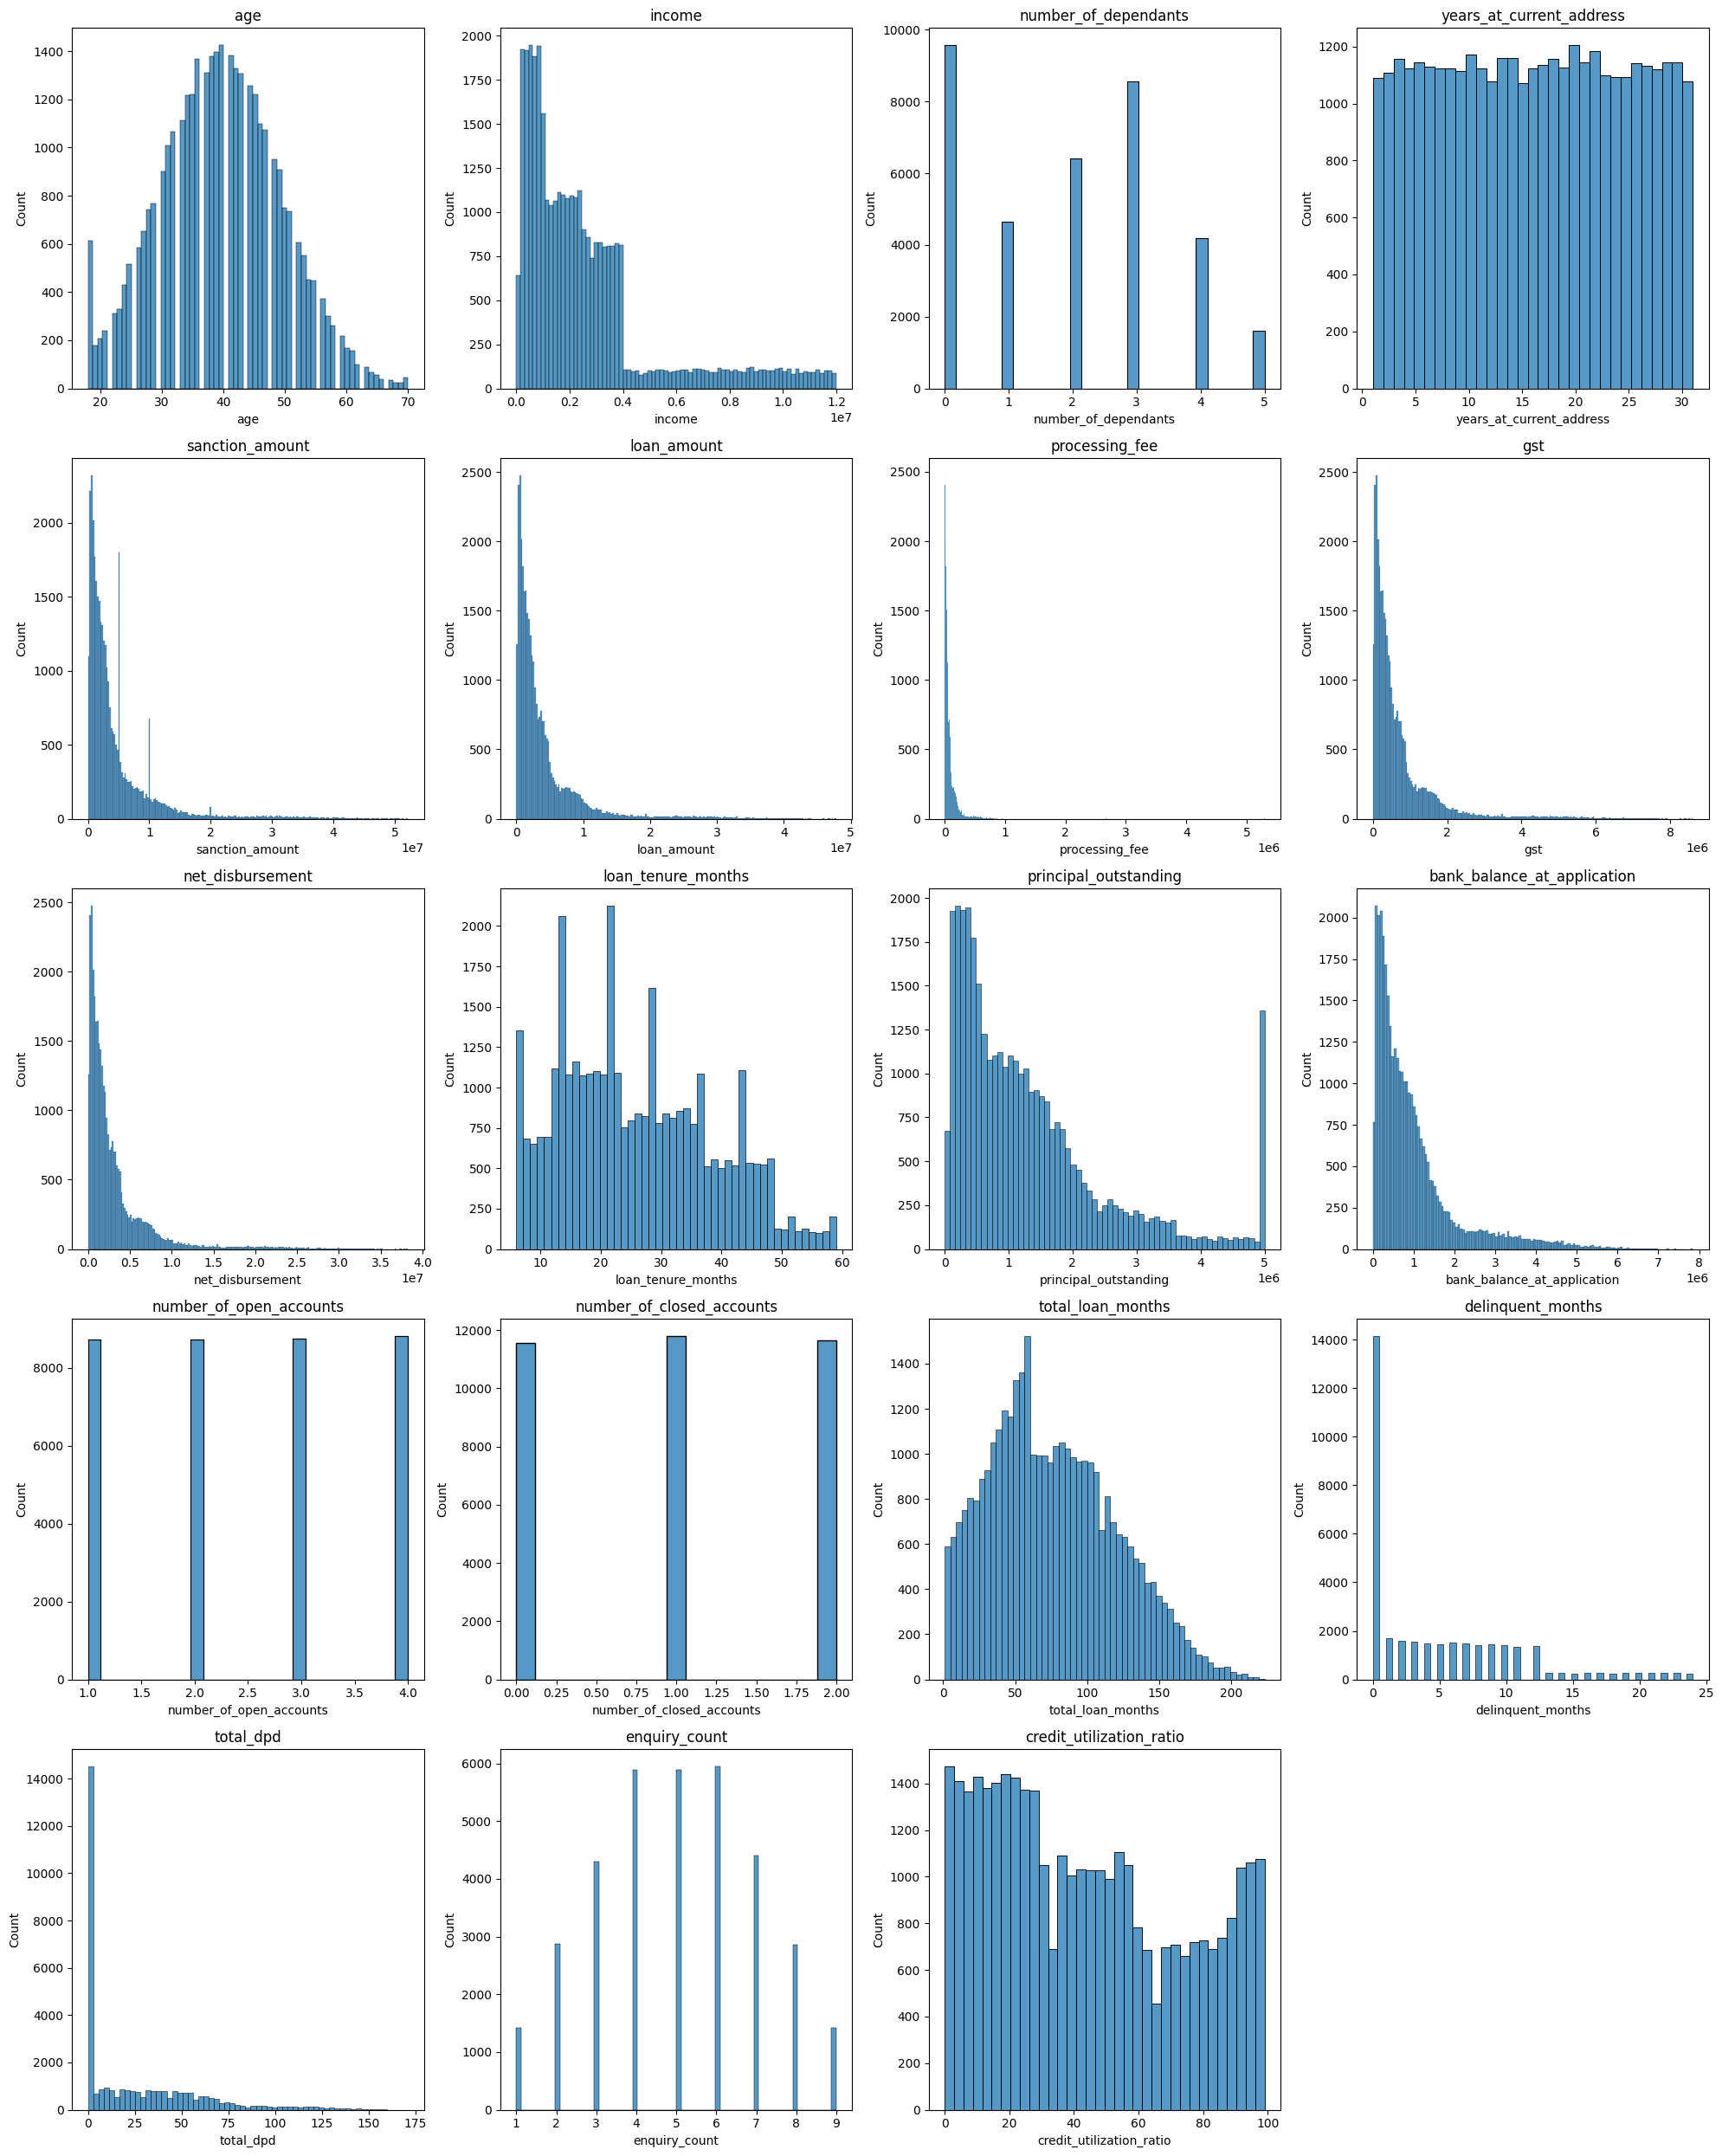

In [31]:
## Check Histograms for each numeric feature

num_plots = len(num_cols)
num_col=4
num_row = (num_plots+num_col-1) // num_col 

fig, axes = plt.subplots(num_row, num_col, figsize=(5*num_col, 5*num_row))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(x=dftrain[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, num_row*num_col):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [150]:
## Processing fee - outlier handling

dftrain['processing_fee'].describe()

count     35000.00
mean      80487.91
std      113750.07
min           0.00
25%       19260.00
50%       44690.00
75%       92580.00
max     5293543.52
Name: processing_fee, dtype: float64

In [151]:
## Checking processing fee wrt loan_amount

dftrain[dftrain['processing_fee'] / dftrain['loan_amount'] > 0.02][['processing_fee', 'loan_amount']]

## processing_fee to loan_amount ratio -> threshold can be kept as 0.02 , as there are only 5 values beyond 0.02 which are outliers

,processing_fee,loan_amount
23981,2669791.02,2234000
28174,1214492.67,966000
47089,1858964.77,1738000
29305,3036378.01,2616000
9898,5293543.52,3626000


In [152]:
dftrain1 = dftrain[dftrain['processing_fee']/dftrain['loan_amount'] <= 0.02].copy()
dftrain1.shape

(34989, 33)

In [153]:
dftest = dftest[dftest['processing_fee']/dftest['loan_amount'] <= 0.02].copy()
dftest.shape

(14996, 33)

In [154]:
## Apply business rules
## GST should not more than 20%

dftrain1[dftrain1['gst'] / dftrain1['loan_amount'] > 0.2].shape

(0, 33)

In [155]:
## business rule 2
## Net disbursement should not be higher than loan_amount

dftrain1[dftrain1['net_disbursement'] > dftrain1['loan_amount']].shape

(0, 33)

In [59]:
## Both business rules are satisfied

In [156]:
## Categorical columns

cat_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [157]:
for c in cat_cols:
    print(c, ": ", dftrain1[c].unique())

gender :  ['F' 'M']
marital_status :  ['Married' 'Single']
employment_status :  ['Self-Employed' 'Salaried']
residence_type :  ['Owned' 'Rented' 'Mortgage']
city :  ['Mumbai' 'Kolkata' 'Lucknow' 'Chennai' 'Hyderabad' 'Jaipur' 'Pune'
 'Bangalore' 'Ahmedabad' 'Delhi']
state :  ['Maharashtra' 'West Bengal' 'Uttar Pradesh' 'Tamil Nadu' 'Telangana'
 'Rajasthan' 'Karnataka' 'Gujarat' 'Delhi']
zipcode :  [400001 700001 226001 600001 500001 302001 411001 560001 380001 110001]
loan_purpose :  ['Education' 'Home' 'Personal' 'Auto' 'Personaal']
loan_type :  ['Secured' 'Unsecured']
default :  [0 1]


In [158]:
dftrain1['loan_purpose'] = dftrain1['loan_purpose'].replace({"Personaal" : "Personal"})
dftrain1['loan_purpose'].unique()

array(['Education', 'Home', 'Personal', 'Auto'], dtype=object)

In [160]:
dftest['loan_purpose'] = dftest['loan_purpose'].replace({"Personaal" : "Personal"})
dftest['loan_purpose'].unique()

array(['Personal', 'Home', 'Education', 'Auto'], dtype=object)

## Exploratory Data Analysis

In [161]:
dftrain1.groupby('default')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,31981.00,39.74,9.88,18.00,33.00,40.00,46.00,70.00
1,3008.00,37.19,9.34,18.00,31.00,37.00,44.00,70.00


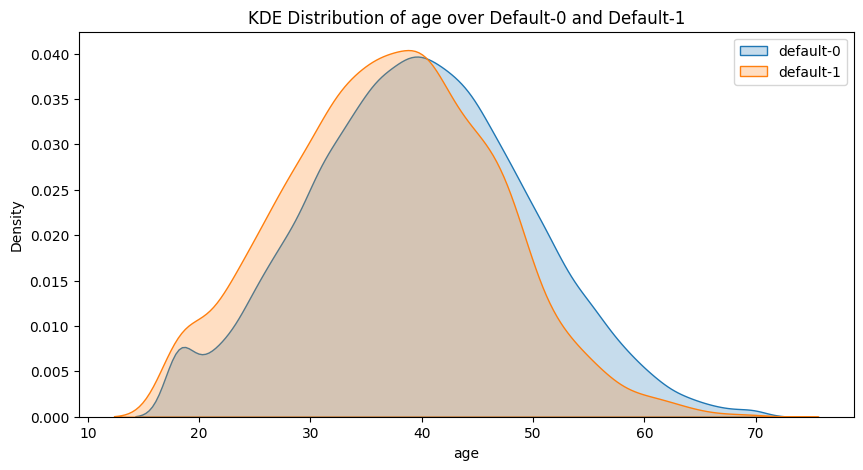

In [162]:
plt.figure(figsize=(10,5))
sns.kdeplot(dftrain1[dftrain1['default']==0]['age'], fill=True, label="default-0")
sns.kdeplot(dftrain1[dftrain1['default']==1]['age'], fill=True, label="default-1")
plt.title("KDE Distribution of age over Default-0 and Default-1")
plt.legend()
plt.show()

Plot shows defaulters are bit more in younger age people.

['age', 'income', 'number_of_dependants', 'years_at_current_address', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio']


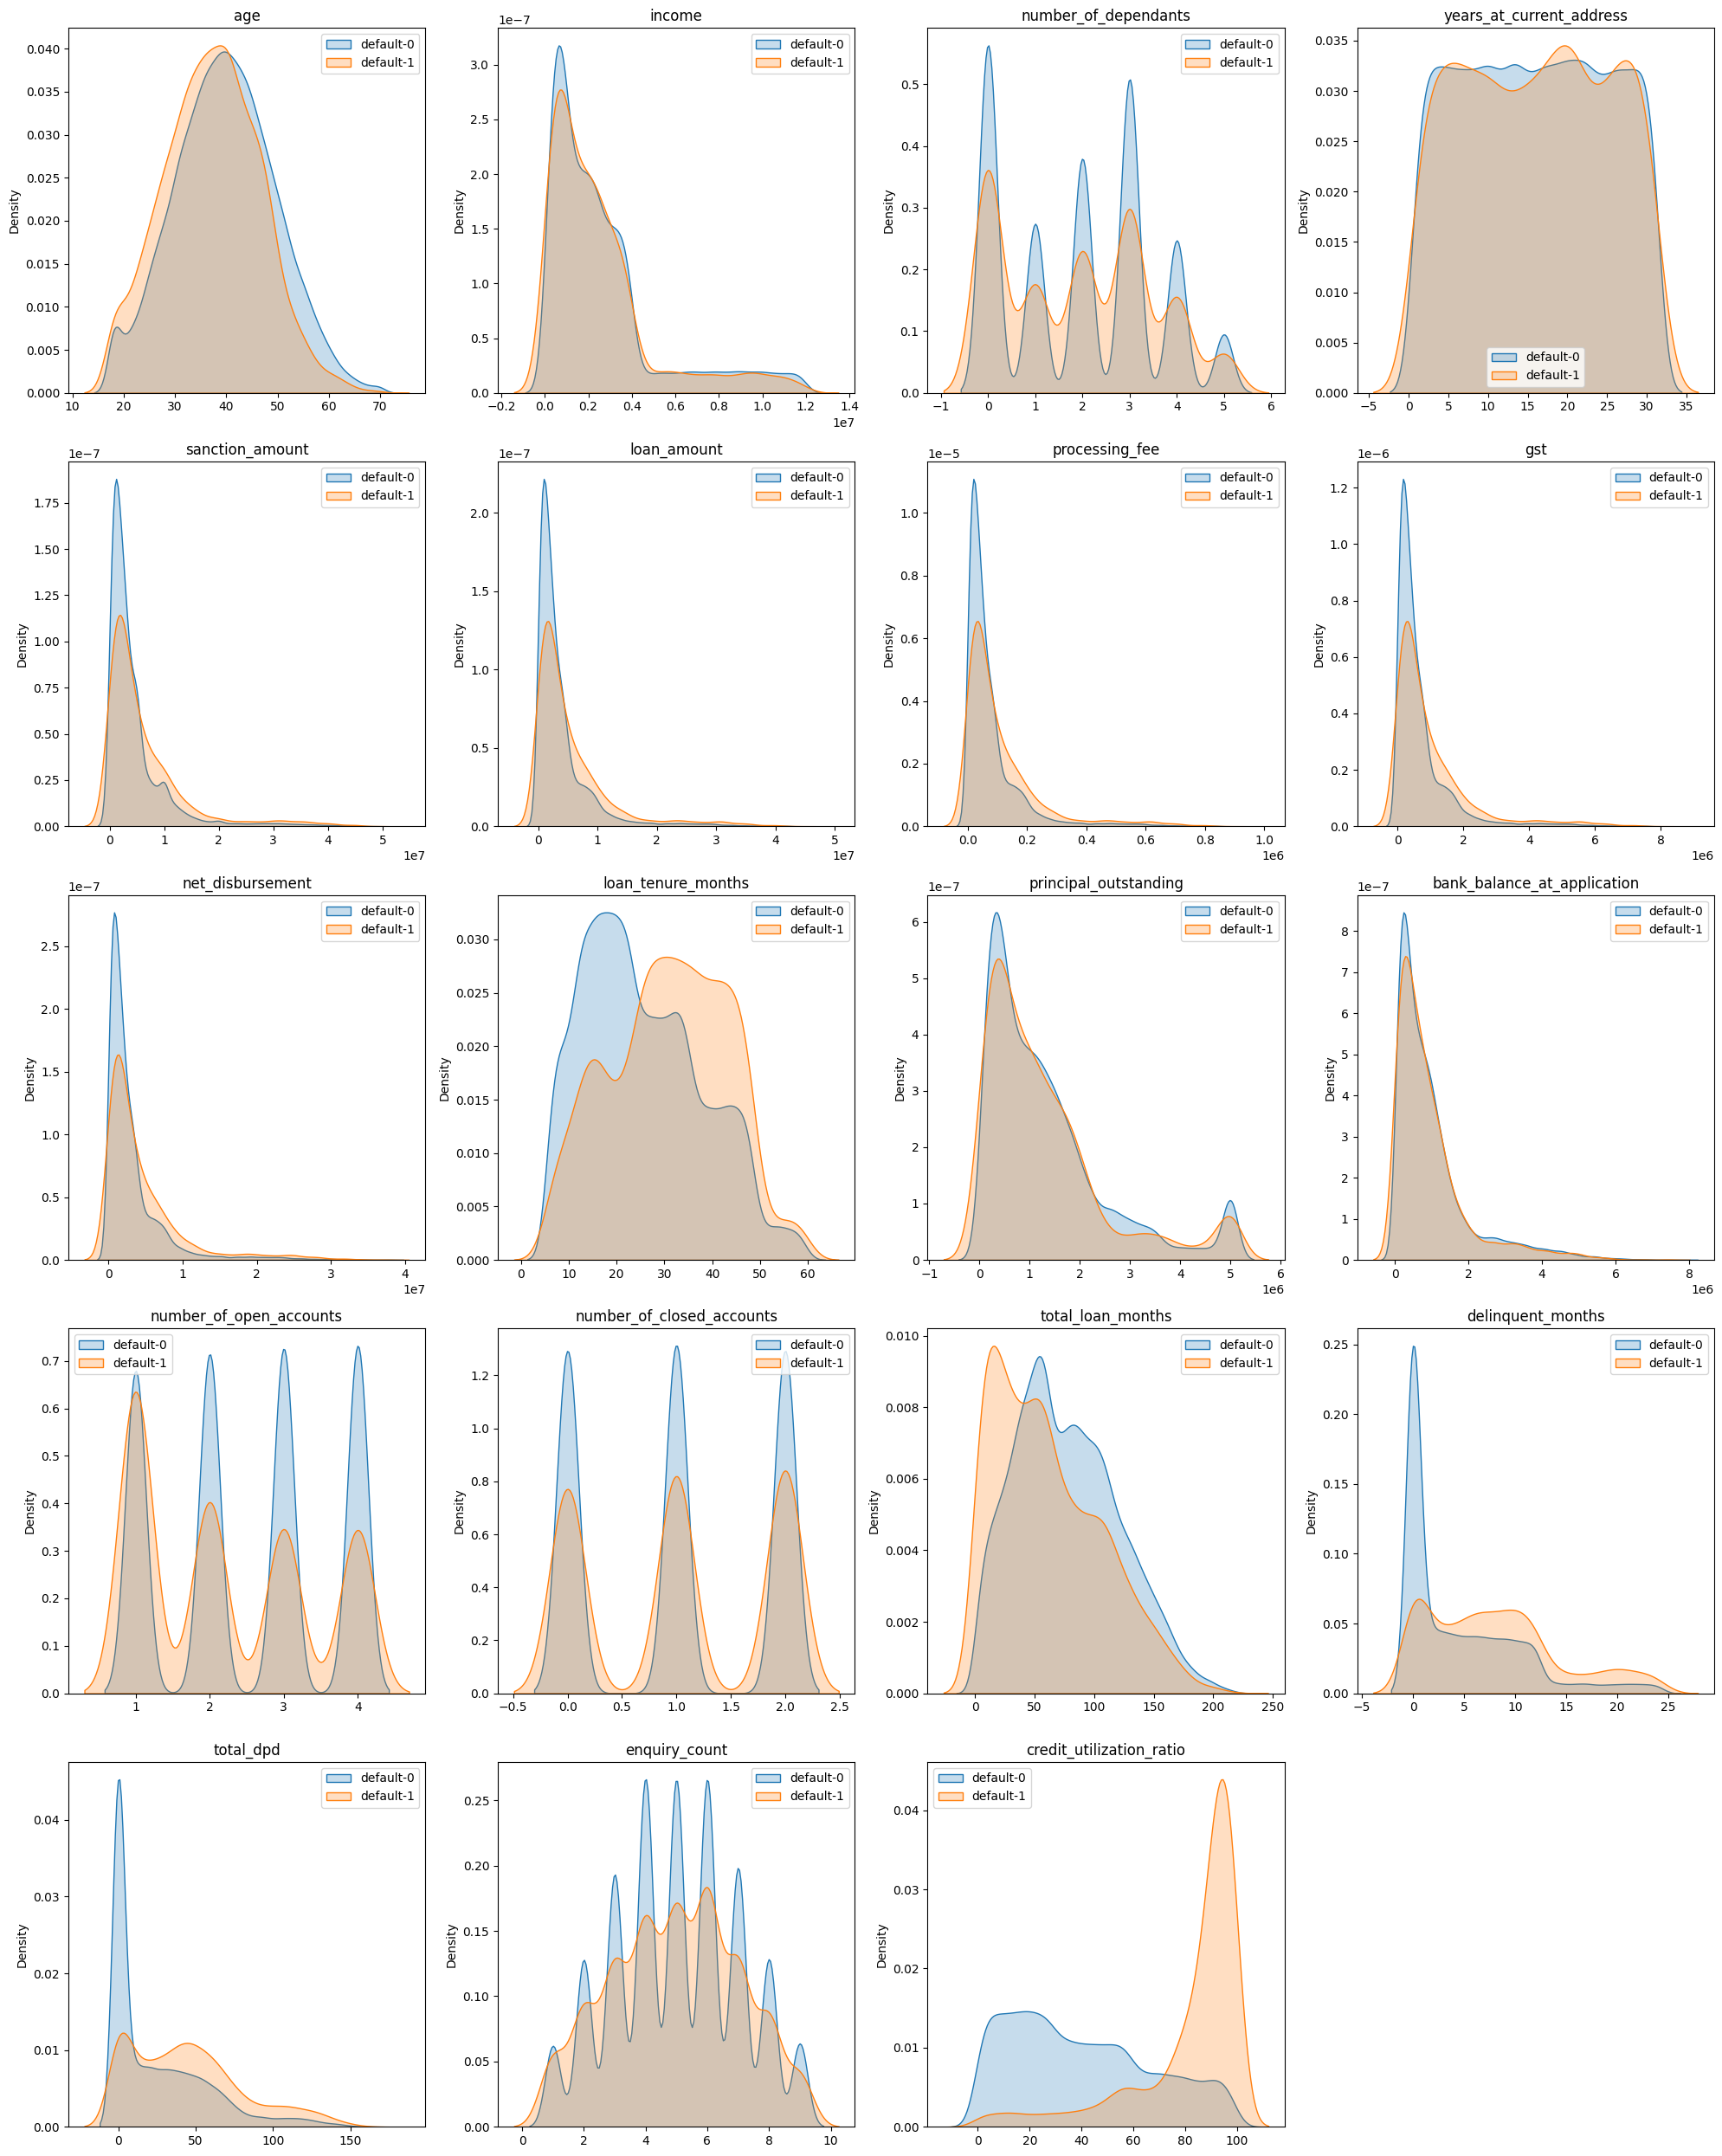

In [163]:
## KDE plots for all numerical columns
print(num_cols)
num_plots=len(num_cols)
num_col=4
num_row=(num_plots+num_col-1) // num_col

fig, axes = plt.subplots(num_row, num_col, figsize=(5*num_col, 5*num_row))
axes = axes.flatten()

for i , col in enumerate(num_cols):
    sns.kdeplot(dftrain1[dftrain1['default']==0][col], fill=True, label='default-0', ax=axes[i])
    sns.kdeplot(dftrain1[dftrain1['default']==1][col], fill=True, label='default-1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].legend()
for j in range(i+1, num_row * num_col):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

From above plots, loan_tenure_months, total_loan_months, delinquent_months, total_dpd, credit_utilization_ratio are showing more impact on default.


## Feature Engineering and Feature Selection

In [164]:
## Calculate Loan-to-income ratio

dftrain1[['loan_amount', 'income']].head()

,loan_amount,income
35147,126000,109000
15711,7562000,2513000
5304,4252000,11589000
24708,1535000,1852000
33512,2016000,1564000


In [165]:
dftrain1['loan_to_income'] = round(dftrain1['loan_amount']/dftrain1['income'] , 2)
dftrain1['loan_to_income'].head()

35147   1.16
15711   3.01
5304    0.37
24708   0.83
33512   1.29
Name: loan_to_income, dtype: float64

In [166]:
dftest['loan_to_income'] = round(dftest['loan_amount']/dftest['income'] , 2)

In [167]:
dftrain1['loan_to_income'].describe()

count   34989.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

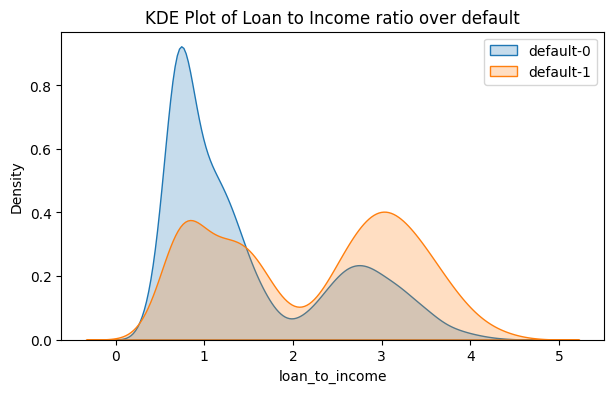

In [168]:
plt.figure(figsize=(7,4))
sns.kdeplot(dftrain1[dftrain1['default']==0]['loan_to_income'], fill=True, label='default-0')
sns.kdeplot(dftrain1[dftrain1['default']==1]['loan_to_income'], fill=True, label='default-1')
plt.title("KDE Plot of Loan to Income ratio over default")
plt.legend()
plt.show()

Lower values of Loan per income are not risky. But higher loan_amounts per income shows more risk.

In [169]:
## Calculate Delinquent months to total loan months ratio

dftrain1['delinquent_months_ratio'] = round(dftrain1['delinquent_months'] *100 / dftrain1['total_loan_months'] , 1)
dftrain1['delinquent_months_ratio'].head()

35147     4.60
15711   100.00
5304      0.00
24708     0.00
33512     0.00
Name: delinquent_months_ratio, dtype: float64

In [170]:
dftrain1['delinquent_months_ratio'].describe()

count   34989.00
mean       10.30
std        17.28
min         0.00
25%         0.00
50%         3.60
75%        12.90
max       100.00
Name: delinquent_months_ratio, dtype: float64

In [171]:
dftest['delinquent_months_ratio'] = round(dftest['delinquent_months'] * 100 / dftest['total_loan_months'] , 1)

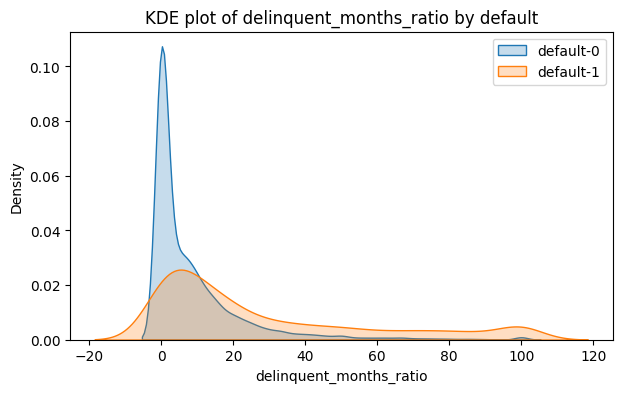

In [88]:
## KDE plot for delinquent_months_ratio by default

plt.figure(figsize=(7,4))
sns.kdeplot(dftrain1[dftrain1['default']==0]['delinquent_months_ratio'], fill=True, label='default-0')
sns.kdeplot(dftrain1[dftrain1['default']==1]['delinquent_months_ratio'], fill=True, label='default-1')
plt.title('KDE plot of delinquent_months_ratio by default')
plt.legend()
plt.show()

The more the delinquent_months_ratio , the more risk for default.

In [172]:
## Calculate Avg DPD per Delinquency

dftrain1['avg_dpd_per_delinquency'] = np.where(dftrain1['delinquent_months'] != 0, round(dftrain1['total_dpd']/dftrain1['delinquent_months'], 1), 0)
dftrain1['avg_dpd_per_delinquency'].describe()

count   34989.00
mean        3.28
std         2.91
min         0.00
25%         0.00
50%         4.30
75%         5.70
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

In [173]:
dftest['avg_dpd_per_delinquency'] = np.where(dftest['delinquent_months'] != 0, round(dftest['total_dpd']/dftest['delinquent_months'], 1), 0)

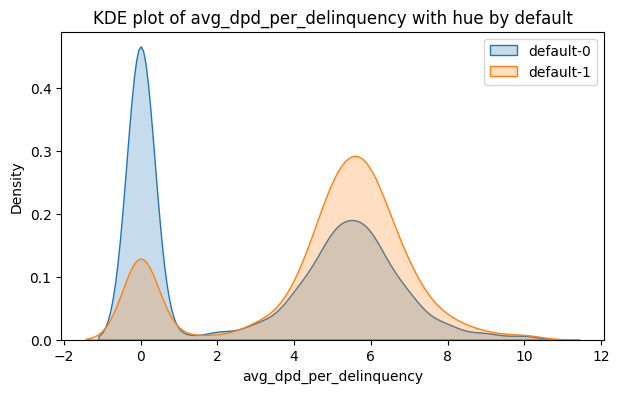

In [174]:
## KDE plot of avg_dpd_per_delinquency by default

plt.figure(figsize=(7,4))
sns.kdeplot(dftrain1[dftrain1['default']==0]['avg_dpd_per_delinquency'], fill=True, label='default-0')
sns.kdeplot(dftrain1[dftrain1['default']==1]['avg_dpd_per_delinquency'], fill=True, label='default-1')
plt.title("KDE plot of avg_dpd_per_delinquency with hue by default")
plt.legend()
plt.show()

when avg_dpd_per_delinquency ratio is higher, the risk of default increases.

In [175]:
dftrain1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_months_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [176]:
## Calculate credit_utilization_per_income ,  ratio of credit_utilization_ratio to loan_to_income

dftrain1['credit_utilization_per_income'] = round(dftrain1['credit_utilization_ratio']/dftrain1['loan_to_income'], 1)
dftrain1['credit_utilization_per_income'].describe()

count   34989.00
mean       40.30
std        38.58
min         0.00
25%        11.80
50%        27.60
75%        58.30
max       291.20
Name: credit_utilization_per_income, dtype: float64

In [177]:
dftest['credit_utilization_per_income'] = round(dftest['credit_utilization_ratio']/dftest['loan_to_income'] ,1)

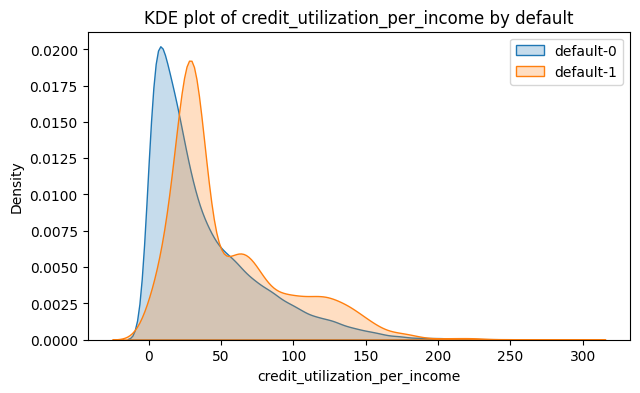

In [178]:
## KDE plot of credit_utilization_per_income with hue by default

plt.figure(figsize=(7,4))
sns.kdeplot(dftrain1[dftrain1['default']==0]['credit_utilization_per_income'], fill=True, label='default-0')
sns.kdeplot(dftrain1[dftrain1['default']==1]['credit_utilization_per_income'], fill=True, label='default-1')
plt.title('KDE plot of credit_utilization_per_income by default')
plt.legend()
plt.show()

The default risk is higher when credit_utilization_per_income increases.

In [179]:
## Removing id columns which have impact on target

dftrain1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_months_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

In [180]:
dftrain2 = dftrain1.drop(['cust_id', 'loan_id'], axis=1)
dftest = dftest.drop(['cust_id', 'loan_id'], axis=1)

In [181]:
dftrain2.columns

Index(['age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_months_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

In [182]:
## Removing columns which business asked to remove

dftrain3 = dftrain2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis=1)
dftest = dftest.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis=1)
dftrain3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_months_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

## Calculate VIF to measure multicolinearity

In [183]:
Xtrain = dftrain3.drop('default', axis=1)
ytrain = dftrain3['default']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = Xtrain.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()
Xtrain[cols_to_scale] = scaler.fit_transform(Xtrain[cols_to_scale])
Xtrain.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_months_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
count,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00,34989.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33,0.14
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.33,0.00,0.38,0.18,0.11,0.00,0.00,0.04
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43,0.09
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57,0.20
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [184]:
Xtest = dftest.drop('default', axis=1)
ytest = dftest['default']

Xtest[cols_to_scale] = scaler.transform(Xtest[cols_to_scale])
Xtest.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_months_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
count,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00
mean,0.42,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33,0.14
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29,0.13
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00,0.04
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44,0.09
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.67,0.50,0.13,0.58,0.20
max,1.00,1.00,1.00,1.00,1.00,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.96


In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vifdf = pd.DataFrame()
    vifdf['Column'] = data.columns
    vifdf['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vifdf

In [186]:
vifdf = calculate_vif(Xtrain[cols_to_scale])
vifdf

,Column,VIF
0,age,5.94
1,number_of_dependants,2.73
2,years_at_current_address,3.45
3,zipcode,3.82
4,sanction_amount,101.87
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.38
9,principal_outstanding,16.63


In [187]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']

Xtrain1 = Xtrain.drop(features_to_drop_vif, axis=1)


In [188]:
numeric_cols = Xtrain1.select_dtypes(['int64', 'float64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_months_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income'],
      dtype='object')

In [189]:
vifdf = calculate_vif(Xtrain1[numeric_cols])
vifdf

,Column,VIF
0,age,5.61
1,number_of_dependants,2.72
2,years_at_current_address,3.44
3,zipcode,3.81
4,loan_tenure_months,6.24
5,bank_balance_at_application,1.89
6,number_of_open_accounts,4.36
7,number_of_closed_accounts,2.38
8,enquiry_count,6.42
9,credit_utilization_ratio,10.13


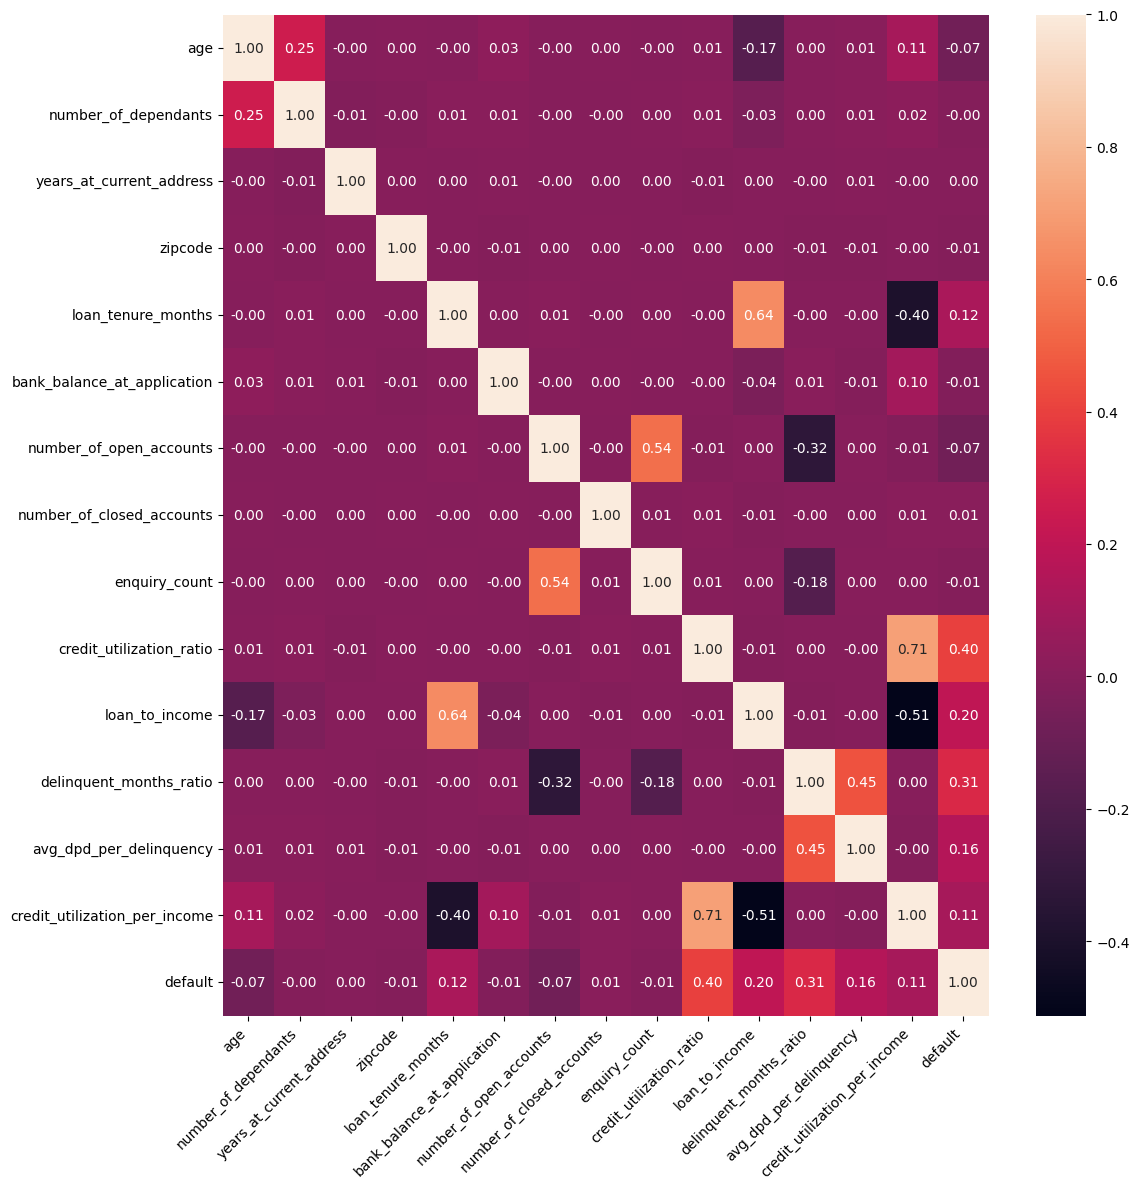

In [190]:
##  Heatmap of correlation matric with selected vif columns
plt.figure(figsize=(12,12))
cm = dftrain3[numeric_cols.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Selection - Categorical Features

In [191]:
Xtrain1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_months_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
35147,0.67,F,Married,Self-Employed,0.80,Owned,0.67,Mumbai,Maharashtra,0.49,...,0.38,0.00,1.00,0.00,0.75,0.47,0.20,0.05,0.60,0.14
15711,0.52,F,Single,Self-Employed,0.20,Owned,0.07,Mumbai,Maharashtra,0.49,...,0.36,0.08,0.00,0.50,0.00,0.97,0.63,1.00,0.55,0.11
5304,0.37,M,Single,Self-Employed,0.20,Rented,0.93,Kolkata,West Bengal,1.00,...,0.19,0.21,1.00,0.00,1.00,0.13,0.02,0.00,0.00,0.12
24708,0.63,M,Single,Self-Employed,0.40,Mortgage,0.67,Lucknow,Uttar Pradesh,0.20,...,0.11,0.07,0.67,0.50,0.50,0.33,0.12,0.00,0.00,0.14
33512,0.71,F,Married,Self-Employed,0.60,Owned,0.37,Chennai,Tamil Nadu,0.83,...,0.77,0.10,0.67,0.00,0.75,0.93,0.23,0.00,0.00,0.24


## Calculate WOE and IV

In [192]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count':'total', 'sum':'good'})
    grouped['bad'] = grouped['total'] - grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['goodpct'] = grouped['good'] / total_good
    grouped['badpct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['goodpct']/grouped['badpct'])
    grouped['iv'] = (grouped['goodpct'] - grouped['badpct']) * grouped['woe']
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    totaliv = grouped['iv'].sum()

    return grouped, totaliv

In [193]:
grouped , totaliv = calculate_woe_iv(pd.concat([Xtrain1, ytrain], axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,goodpct,badpct,woe,iv
loan_purpose,,,,,,,
Auto,6939,299,6640,0.10,0.21,-0.74,0.08
Education,5229,526,4703,0.17,0.15,0.17,0.00
Home,10558,1619,8939,0.54,0.28,0.66,0.17
Personal,12263,564,11699,0.19,0.37,-0.67,0.12


In [194]:
iv_values = {}
for feature in Xtrain1.columns:
    if Xtrain1[feature].dtype == 'object':
        _ , iv = calculate_woe_iv(pd.concat([Xtrain1, ytrain], axis=1), feature, 'default')
    else:
        Xbinned = pd.cut(Xtrain1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([Xbinned, ytrain], axis=1), feature, 'default')
    iv_values[feature]=iv
iv_values

{'age': np.float64(0.08294884382534698),
 'gender': np.float64(0.0005470689988456485),
 'marital_status': np.float64(0.0007768496647095973),
 'employment_status': np.float64(0.0032669182581258976),
 'number_of_dependants': np.float64(0.0016005163215862769),
 'residence_type': np.float64(0.2417445940608381),
 'years_at_current_address': np.float64(0.0023117519748565743),
 'city': np.float64(0.0014778156191917427),
 'state': np.float64(0.0014699447992313204),
 'zipcode': np.float64(0.0013405431436694618),
 'loan_purpose': np.float64(0.3732283583836844),
 'loan_type': np.float64(0.16335184616454138),
 'loan_tenure_months': np.float64(0.21861995852234228),
 'bank_balance_at_application': np.float64(0.005691894568352511),
 'number_of_open_accounts': np.float64(0.08518737528620192),
 'number_of_closed_accounts': np.float64(0.001228781943864797),
 'enquiry_count': np.float64(0.007224441458625544),
 'credit_utilization_ratio': np.float64(2.3821032471610226),
 'loan_to_income': np.float64(0.471

In [195]:
pd.set_option('display.float_format', lambda x: f"{x:.3f}")

ivdf = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
ivdf = ivdf.sort_values(by='IV', ascending=False)
ivdf

,Feature,IV
17,credit_utilization_ratio,2.382
19,delinquent_months_ratio,0.710
18,loan_to_income,0.472
20,avg_dpd_per_delinquency,0.406
10,loan_purpose,0.373
5,residence_type,0.242
12,loan_tenure_months,0.219
21,credit_utilization_per_income,0.199
11,loan_type,0.163
14,number_of_open_accounts,0.085


In [199]:
## Select features that have IV > 0.02

selected_features_iv = [f for f, iv in iv_values.items() if iv > 0.02]

In [200]:
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_months_ratio',
 'avg_dpd_per_delinquency',
 'credit_utilization_per_income']

## Encoding Categorical values

In [201]:
Xtrain_reduced = Xtrain1[selected_features_iv]
Xtest_reduced = Xtest[selected_features_iv]

Xtrain_reduced.head(3)

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_months_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
35147,0.673,Owned,Education,Secured,0.377,1.000,0.475,0.201,0.046,0.600,0.139
15711,0.519,Owned,Home,Secured,0.358,0.000,0.970,0.635,1.000,0.550,0.110
5304,0.365,Rented,Personal,Unsecured,0.189,1.000,0.131,0.016,0.000,0.000,0.121


In [202]:
Xtrain_encoded = pd.get_dummies(Xtrain_reduced, drop_first=True)
Xtrain_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_months_ratio,avg_dpd_per_delinquency,credit_utilization_per_income,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
35147,0.673,0.377,1.000,0.475,0.201,0.046,0.600,0.139,True,False,True,False,False,False
15711,0.519,0.358,0.000,0.970,0.635,1.000,0.550,0.110,True,False,False,True,False,False
5304,0.365,0.189,1.000,0.131,0.016,0.000,0.000,0.121,False,True,False,False,True,True


In [203]:
Xtest_encoded = pd.get_dummies(Xtest_reduced, drop_first=True)
Xtest_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_months_ratio,avg_dpd_per_delinquency,credit_utilization_per_income,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19401,0.385,0.264,0.333,0.051,0.098,0.122,0.430,0.024,True,False,False,False,True,True
43576,0.385,0.358,0.000,0.273,0.705,0.000,0.000,0.028,True,False,False,True,False,False
43161,0.692,0.981,0.667,0.020,0.185,0.152,0.540,0.006,True,False,True,False,False,False


## Model Training

### Attempt 1
Logistic Regression, RandomForest & XGB

No handling of class imbalance

In [205]:
## LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lrmodel = LogisticRegression()
lrmodel.fit(Xtrain_encoded, ytrain)

ypred = lrmodel.predict(Xtest_encoded)
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13707
           1       0.84      0.71      0.77      1289

    accuracy                           0.96     14996
   macro avg       0.91      0.85      0.88     14996
weighted avg       0.96      0.96      0.96     14996



In [207]:
lrmodel.coef_

array([[-0.62331054,  0.34818098,  0.61622672, 12.5550677 , 10.42057513,
         9.43921213,  1.9423693 ,  0.44147377, -1.46352053,  1.41496492,
         1.03262591, -1.21503501,  0.58371471,  0.58371471]])

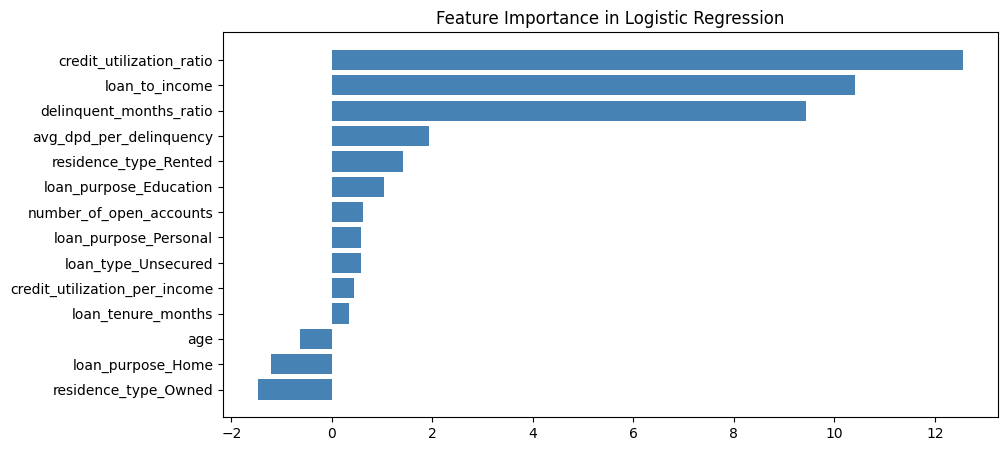

In [208]:
feature_importance = lrmodel.coef_[0]
coefdf = pd.DataFrame(feature_importance, index=Xtrain_encoded.columns, columns=['Coefficients'])
coefdf = coefdf.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(10,5))
plt.barh(coefdf.index, coefdf['Coefficients'], color='steelblue')
plt.title("Feature Importance in Logistic Regression")
plt.show()

In [210]:
## RandomForest
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier()
rfmodel.fit(Xtrain_encoded, ytrain)

ypred = rfmodel.predict(Xtest_encoded)
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13707
           1       0.84      0.72      0.77      1289

    accuracy                           0.96     14996
   macro avg       0.91      0.85      0.88     14996
weighted avg       0.96      0.96      0.96     14996



In [212]:
## XGBoost
from xgboost import XGBClassifier

xgbmodel = XGBClassifier()
xgbmodel.fit(Xtrain_encoded, ytrain)

ypred = xgbmodel.predict(Xtest_encoded)
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13707
           1       0.82      0.75      0.78      1289

    accuracy                           0.96     14996
   macro avg       0.90      0.86      0.88     14996
weighted avg       0.96      0.96      0.96     14996



### Bayesian Optimization  with LogisticRegression

In [227]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def lr_cv(C, max_iter):
    lrmodel = LogisticRegression(C=C, max_iter=int(max_iter), solver='liblinear', penalty='l2', random_state=42)
    scores = cross_val_score(lrmodel, Xtrain_encoded, ytrain, cv=5, scoring='roc_auc')
    return scores.mean()

pbounds = {
    'C': (0.0001, 100),
    'max_iter': (50, 1000)
    }
optimizer = BayesianOptimization(
    f = lr_cv,
    pbounds = pbounds,
    random_state=42,
    verbose=2
)
optimizer.maximize(init_points=5, n_iter=50)

|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
| 1         | 0.9827124 | 37.454074 | 953.17859 |
| 2         | 0.9827153 | 73.199420 | 618.72555 |
| 3         | 0.9827122 | 15.601948 | 198.19479 |
| 4         | 0.9826941 | 5.8084554 | 872.86733 |
| 5         | 0.9827149 | 60.111541 | 722.66894 |
| 6         | 0.9827144 | 71.812335 | 618.32587 |
| 7         | 0.9827148 | 97.875273 | 624.01792 |
| 8         | 0.9827151 | 81.749083 | 646.68835 |
| 9         | 0.9827151 | 91.900468 | 591.89643 |
| 10        | 0.9827146 | 71.714932 | 688.43705 |
| 11        | 0.9827119 | 35.067764 | 696.94880 |
| 12        | 0.9827151 | 92.106576 | 719.40931 |
| 13        | 0.9827151 | 79.368788 | 751.50321 |
| 14        | 0.9827121 | 45.920296 | 755.87245 |
| 15        | 0.9827148 | 99.908102 | 684.15755 |
| 16        | 0.9827147 | 92.536414 | 784.19987 |
| 17        | 0.9827150 | 88.871743 | 557.39147 |
| 18        | 0.9827145 | 56.153457 | 553.59302 |


In [228]:
best_params = optimizer.max['params']
print(best_params)

{'C': np.float64(75.77181938202341), 'max_iter': np.float64(257.171893219773)}


In [230]:
best_params['max_iter'] = int(best_params['max_iter'])
finallrmodel = LogisticRegression(**best_params, solver='liblinear')
finallrmodel.fit(Xtrain_encoded, ytrain)

LogisticRegression(C=np.float64(75.77181938202341), max_iter=257,
                   solver='liblinear')

In [231]:
ypred = finallrmodel.predict(Xtest_encoded)

In [232]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13707
           1       0.83      0.73      0.78      1289

    accuracy                           0.96     14996
   macro avg       0.90      0.86      0.88     14996
weighted avg       0.96      0.96      0.96     14996



In [235]:
## ROC_AUC Score
from sklearn.metrics import roc_auc_score

print(roc_auc_score(ytest, ypred))

0.8586013228306953


### Attempt 2 -  GridSearchCV with XGBoost


In [246]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [20, 40, 50, 80, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree' : [0.6,0.8,1.0],
    'gamma': [0,0.1,0.5,1]
}

xgbmodel = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

gridsearch = GridSearchCV(estimator=xgbmodel, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1)

gridsearch.fit(Xtrain_encoded, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.5, 1],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6, 8, 10],
                         'n_estimators': [20, 40, 50, 80, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc')

In [251]:
best_params = gridsearch.best_params_
best_params

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [252]:
finalxgbmodel = gridsearch.best_estimator_

ypred = finalxgbmodel.predict(Xtest_encoded)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13707
           1       0.84      0.75      0.79      1289

    accuracy                           0.97     14996
   macro avg       0.91      0.87      0.89     14996
weighted avg       0.97      0.97      0.97     14996



In [253]:
## ROC_AUC score
print(roc_auc_score(ytest, ypred))

0.8674037711445506


## Shap

SHAP (SHapley Additive exPlanations) is a powerful and widely used framework for interpreting predictions of machine learning models. It explains the output of a model by computing the contribution of each feature to the prediction.

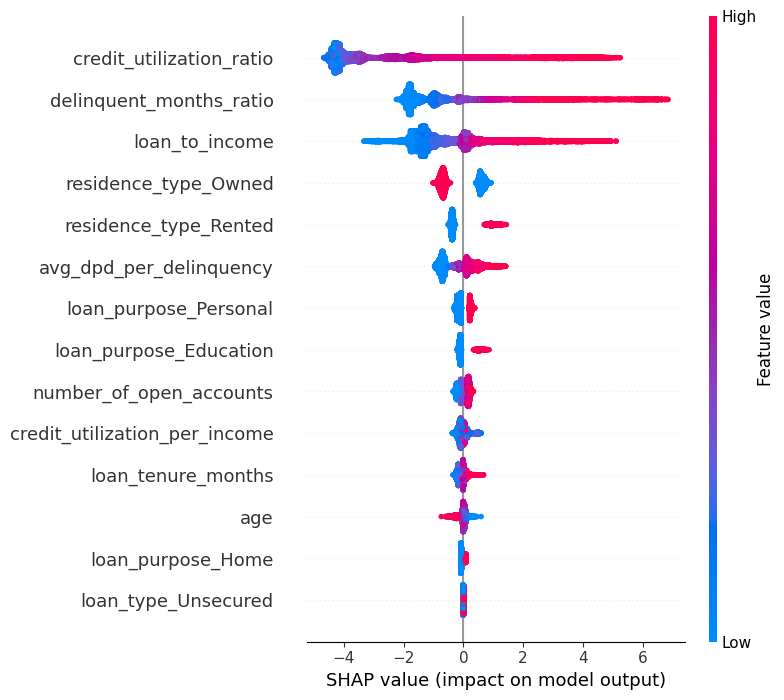

In [254]:
## Explain with Shap
import shap

explainer = shap.TreeExplainer(finalxgbmodel)
shap_values = explainer.shap_values(Xtest_encoded)

shap.summary_plot(shap_values, Xtest_encoded)

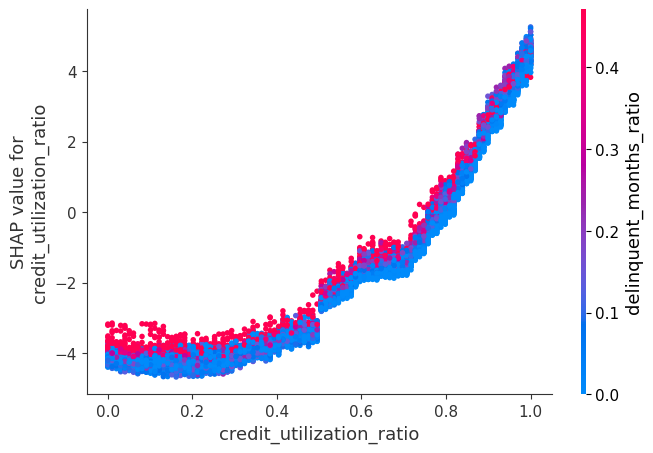

In [255]:
shap.dependence_plot('credit_utilization_ratio', shap_values, Xtest_encoded)

In [256]:
shap.initjs()

In [257]:
shap.force_plot(explainer.expected_value, shap_values[0,:], Xtest_encoded.iloc[0,:])

In [261]:
Xtrain_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_months_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [263]:
from joblib import dump

features = ['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_months_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured']

model_data = {
    'model' : finallrmodel,
    'features': features,
    'scaler' : scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, "artifacts/model_data.joblib")

['artifacts/model_data.joblib']